# Logistic Regression

In [23]:
import torch.nn as nn
import torch
import matplotlib.pyplot as plt 

In [24]:
torch.manual_seed(2)

In [25]:
z = torch.arange(-100,100,0.1).view(-1,1)
z

tensor([[-100.0000],
        [ -99.9000],
        [ -99.8000],
        ...,
        [  99.7000],
        [  99.8000],
        [  99.9000]])

In [26]:
# creates an object
sig = nn.Sigmoid()
yhat = sig(z)

Text(0, 0.5, 'yhat')

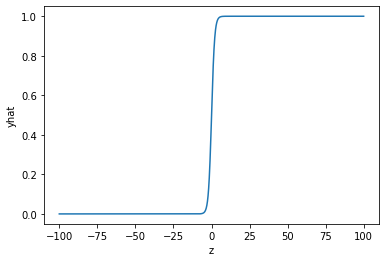

In [27]:
plt.plot(z.numpy(), yhat.numpy())
plt.xlabel('z')
plt.ylabel('yhat')

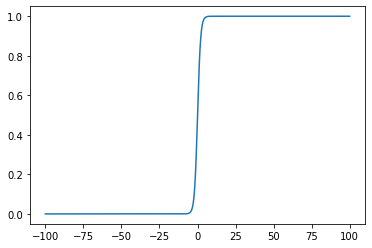

In [28]:
# elementwise Sigmoid 
yhat1 = torch.sigmoid(z)
plt.plot(z.numpy(),yhat.numpy())

In [29]:
x = torch.tensor([[1.0]])
X = torch.tensor([[1.0], [100]])
print(x)
print(X)

tensor([[1.]])
tensor([[  1.],
        [100.]])


In [30]:
model = nn.Sequential(nn.Linear(1,1), nn.Sigmoid())

In [31]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.2294]], requires_grad=True), Parameter containing:
tensor([-0.2380], requires_grad=True)]


In [32]:
print(model.state_dict())

OrderedDict([('0.weight', tensor([[0.2294]])), ('0.bias', tensor([-0.2380]))])


In [33]:
yhat1 = model(x)
print(yhat1)

tensor([[0.4979]], grad_fn=<SigmoidBackward>)


In [34]:
yhat = model(X)
print(yhat)

tensor([[0.4979],
        [1.0000]], grad_fn=<SigmoidBackward>)


## custom module

In [35]:
class logistic_regression(nn.Module):
    
    # Constructor
    def __init__(self, n_inputs):
        super(logistic_regression, self).__init__()
        self.linear = nn.Linear(n_inputs, 1)
    
    # Prediction
    def forward(self, x):
        yhat = torch.sigmoid(self.linear(x))
        return yhat

In [36]:
x = torch.tensor([[1.0]])
X = torch.tensor([[-100], [0], [100.0]])
print(x)
X

tensor([[1.]])


tensor([[-100.],
        [   0.],
        [ 100.]])

In [42]:
model = logistic_regression(1)
print(model.state_dict())

OrderedDict([('linear.weight', tensor([[-0.1149]])), ('linear.bias', tensor([-0.8085]))])


In [39]:
yhat = model(x)
print(yhat)

tensor([[0.6604]], grad_fn=<SigmoidBackward>)


In [41]:
yhat = model(X)
print(yhat)

tensor([[3.5552e-19],
        [5.5924e-01],
        [1.0000e+00]], grad_fn=<SigmoidBackward>)


### LGR with bad initialization value

In [43]:
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits import mplot3d
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn

In [44]:
# Create class for plotting and the function for plotting

class plot_error_surfaces(object):
    
    # Construstor
    def __init__(self, w_range, b_range, X, Y, n_samples = 30, go = True):
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B)    
        Z = np.zeros((30, 30))
        count1 = 0
        self.y = Y.numpy()
        self.x = X.numpy()
        for w1, b1 in zip(w, b):
            count2 = 0
            for w2, b2 in zip(w1, b1):
                Z[count1, count2] = np.mean((self.y - (1 / (1 + np.exp(-1*w2 * self.x - b2)))) ** 2)
                count2 += 1   
            count1 += 1
        self.Z = Z
        self.w = w
        self.b = b
        self.W = []
        self.B = []
        self.LOSS = []
        self.n = 0
        if go == True:
            plt.figure()
            plt.figure(figsize=(7.5, 5))
            plt.axes(projection='3d').plot_surface(self.w, self.b, self.Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
            plt.title('Loss Surface')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.show()
            plt.figure()
            plt.title('Loss Surface Contour')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.contour(self.w, self.b, self.Z)
            plt.show()
            
     # Setter
    def set_para_loss(self, model, loss):
        self.n = self.n + 1
        self.W.append(list(model.parameters())[0].item())
        self.B.append(list(model.parameters())[1].item())
        self.LOSS.append(loss)
    
    # Plot diagram
    def final_plot(self): 
        ax = plt.axes(projection='3d')
        ax.plot_wireframe(self.w, self.b, self.Z)
        ax.scatter(self.W, self.B, self.LOSS, c='r', marker='x', s=200, alpha=1)
        plt.figure()
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c='r', marker='x')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()
        
    # Plot diagram
    def plot_ps(self):
        plt.subplot(121)
        plt.ylim
        plt.plot(self.x, self.y, 'ro', label="training points")
        plt.plot(self.x, self.W[-1] * self.x + self.B[-1], label="estimated line")
        plt.plot(self.x, 1 / (1 + np.exp(-1 * (self.W[-1] * self.x + self.B[-1]))), label='sigmoid')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.ylim((-0.1, 2))
        plt.title('Data Space Iteration: ' + str(self.n))
        plt.show()
        plt.subplot(122)
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c='r', marker='x')
        plt.title('Loss Surface Contour Iteration' + str(self.n))
        plt.xlabel('w')
        plt.ylabel('b')
        
# Plot the diagram

def PlotStuff(X, Y, model, epoch, leg=True):
    plt.plot(X.numpy(), model(X).detach().numpy(), label=('epoch ' + str(epoch)))
    plt.plot(X.numpy(), Y.numpy(), 'r')
    if leg == True:
        plt.legend()
    else:
        pass

In [45]:
torch.manual_seed(0)

In [53]:
# making some data
x = torch.arange(-1,1,0.1).view(-1,1)
x
x.shape

torch.Size([20, 1])

In [57]:
## makin some data
class Data(Dataset):
    
    def __init__(self, x):
        self.x = x
        self.y = torch.zeros(x.shape[0],1)
        self.y[x[:,0]>0.2] = 1
        self.len = x.shape[0]
        
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    def __len__(self):
        return self.len

In [59]:
data_set = Data(x)
data_set.y

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]])

In [60]:

class logistic_regression(nn.Module):
    
    # Constructor
    def __init__(self, n_inputs):
        super(logistic_regression, self).__init__()
        self.linear = nn.Linear(n_inputs, 1)
        
    # Prediction
    def forward(self, x):
        yhat = torch.sigmoid(self.linear(x))
        return yhat

In [61]:
model = logistic_regression(1)

In [71]:
model.state_dict() ['linear.weight'].data[0] = torch.tensor([[-5]])
model.state_dict() ['linear.bias'].data[0] = torch.tensor([[-10]])
model.state_dict()

OrderedDict([('linear.weight', tensor([[-5.]])),
             ('linear.bias', tensor([-10.]))])

<Figure size 432x288 with 0 Axes>

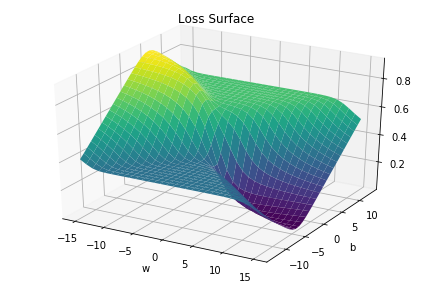

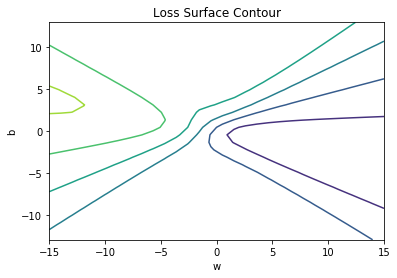

In [63]:
# Create the plot_error_surfaces object

get_surface = plot_error_surfaces(15, 13, data_set[:][0], data_set[:][1], 30)

In [64]:
trainloader = DataLoader(dataset=data_set, batch_size=3)
criterion_rms = nn.MSELoss()
learning_rate = 2
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

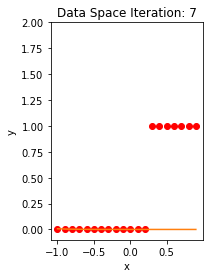

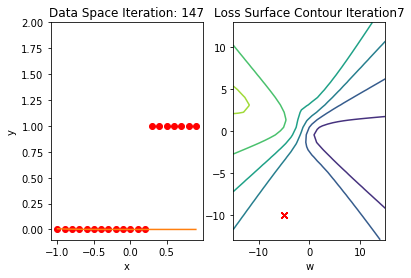

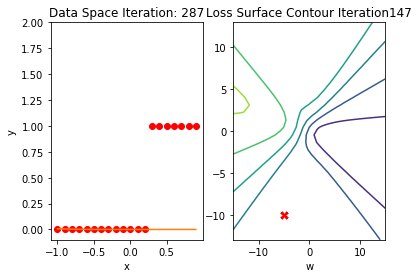

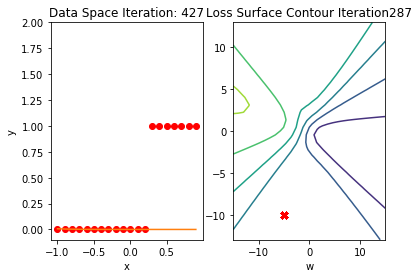

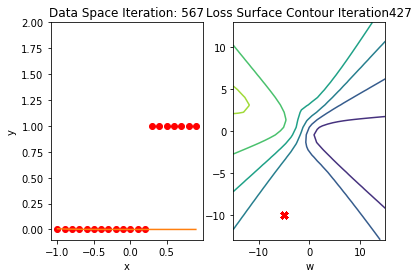

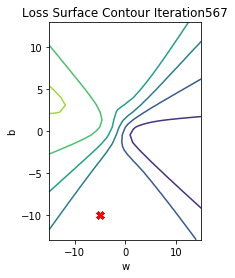

In [65]:
## training

def train_model(epochs):
    for epoch in range(epochs):
        for x, y in trainloader: 
            yhat = model(x)
            loss = criterion_rms(yhat, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            get_surface.set_para_loss(model, loss.tolist())
        if epoch % 20 == 0:
            get_surface.plot_ps()

train_model(100)

In [66]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[-4.9898]])),
             ('linear.bias', tensor([-10.0059]))])

In [67]:
# Make the Prediction

yhat = model(data_set.x)
label = yhat > 0.5
print("The accuracy: ", torch.mean((label == data_set.y.type(torch.ByteTensor)).type(torch.float)))

The accuracy:  tensor(0.6500)


the above happens because the parameters are in a flat part of the loss surface. This will make the gradient close to 0 so through training- the parameter doesnt change much. -- So starting the parameters in a good location is important

### Cross entropy loss function

In [74]:
torch.manual_seed(0)

In [75]:
data_set.y

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]])

In [76]:
model = logistic_regression(1)
model.state_dict() ['linear.weight'].data[0] = torch.tensor([[-5]])
model.state_dict() ['linear.bias'].data[0] = torch.tensor([[-10]])
print(model.state_dict())

OrderedDict([('linear.weight', tensor([[-5.]])), ('linear.bias', tensor([-10.]))])


In [77]:
# Create class for plotting and the function for plotting

class plot_error_surfaces(object):
    
    # Construstor
    def __init__(self, w_range, b_range, X, Y, n_samples = 30, go = True):
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B)    
        Z = np.zeros((30, 30))
        count1 = 0
        self.y = Y.numpy()
        self.x = X.numpy()
        for w1, b1 in zip(w, b):
            count2 = 0
            for w2, b2 in zip(w1, b1):
                yhat= 1 / (1 + np.exp(-1*(w2*self.x+b2)))
                Z[count1,count2]=-1*np.mean(self.y*np.log(yhat+1e-16) +(1-self.y)*np.log(1-yhat+1e-16))
                count2 += 1   
            count1 += 1
        self.Z = Z
        self.w = w
        self.b = b
        self.W = []
        self.B = []
        self.LOSS = []
        self.n = 0
        if go == True:
            plt.figure()
            plt.figure(figsize=(7.5, 5))
            plt.axes(projection='3d').plot_surface(self.w, self.b, self.Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
            plt.title('Loss Surface')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.show()
            plt.figure()
            plt.title('Loss Surface Contour')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.contour(self.w, self.b, self.Z)
            plt.show()
            
     # Setter
    def set_para_loss(self, model, loss):
        self.n = self.n + 1
        self.W.append(list(model.parameters())[0].item())
        self.B.append(list(model.parameters())[1].item())
        self.LOSS.append(loss)
    
    # Plot diagram
    def final_plot(self): 
        ax = plt.axes(projection='3d')
        ax.plot_wireframe(self.w, self.b, self.Z)
        ax.scatter(self.W, self.B, self.LOSS, c='r', marker='x', s=200, alpha=1)
        plt.figure()
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c='r', marker='x')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()
        
    # Plot diagram
    def plot_ps(self):
        plt.subplot(121)
        plt.ylim
        plt.plot(self.x, self.y, 'ro', label="training points")
        plt.plot(self.x, self.W[-1] * self.x + self.B[-1], label="estimated line")
        plt.plot(self.x, 1 / (1 + np.exp(-1 * (self.W[-1] * self.x + self.B[-1]))), label='sigmoid')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.ylim((-0.1, 2))
        plt.title('Data Space Iteration: ' + str(self.n))
        plt.show()
        plt.subplot(122)
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c='r', marker='x')
        plt.title('Loss Surface Contour Iteration' + str(self.n))
        plt.xlabel('w')
        plt.ylabel('b')
        
# Plot the diagram

def PlotStuff(X, Y, model, epoch, leg=True):
    plt.plot(X.numpy(), model(X).detach().numpy(), label=('epoch ' + str(epoch)))
    plt.plot(X.numpy(), Y.numpy(), 'r')
    if leg == True:
        plt.legend()
    else:
        pass

<Figure size 432x288 with 0 Axes>

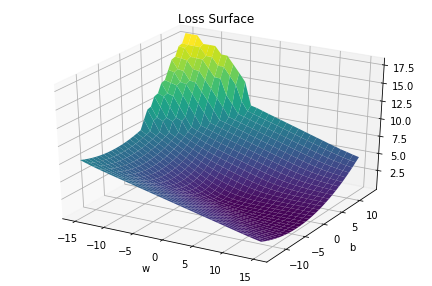

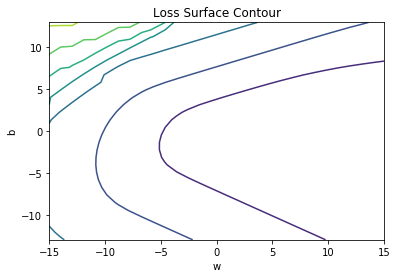

In [78]:
# Create the plot_error_surfaces object

get_surface = plot_error_surfaces(15, 13, data_set[:][0], data_set[:][1], 30)

In [81]:
criterion = nn.BCELoss()
trainloader = DataLoader(dataset = data_set, batch_size = 3)
learning_rate = 2
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

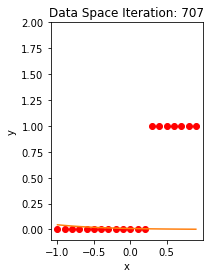

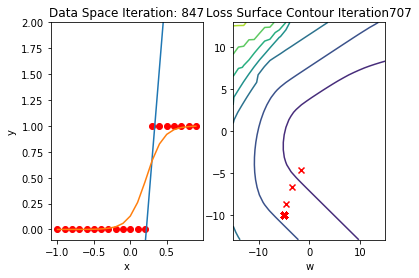

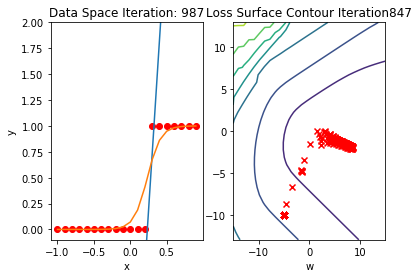

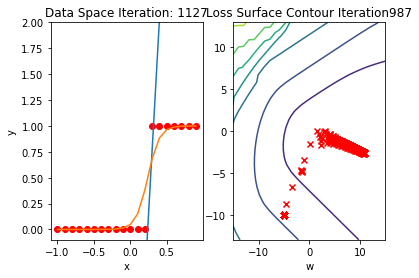

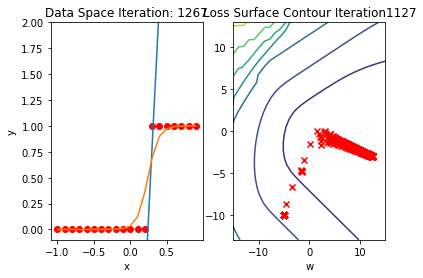

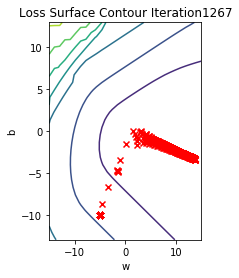

In [82]:
# Train the Model

def train_model(epochs):
    for epoch in range(epochs):
        for x, y in trainloader:
            yhat = model(x)
            loss = criterion(yhat, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            get_surface.set_para_loss(model, loss.tolist())
        if epoch % 20 == 0:
            get_surface.plot_ps()
            
train_model(100)

In [83]:
yhat = model(data_set.x)
label = yhat > 0.5
print("The accuracy: ", torch.mean((label == data_set.y.type(torch.ByteTensor)).type(torch.float)))

The accuracy:  tensor(1.)


So if you use the BCE loss function it makes the loss surface not have flat regions- fix the bad initialization problem above